In [1]:
import sps_interface
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read SimSuite temperature profiles

In [2]:
file_path = '../data/SimSuite_gound_temperature_profiles_March_24_2025.xlsx'
excel_file = pd.ExcelFile(file_path)
sheet_names = excel_file.sheet_names
print("Sheet names:", sheet_names)

Sheet names: ['KSTAB_profiles', 'KSTAB_stationKM', 'STLCBtoNDRLD_profiles', 'STLCBtoNDRLD_stationKM', 'HSTNLtoHSTNT_profiles', 'HSTNLtoHSTNT_stationKM', 'CTGOItoCTGOD_profiles', 'CTGOItoCTGOD_stationKM']


In [3]:
temperature_profile_dict = {}
for sheet_name in sheet_names:
    temperature_profile_dict[sheet_name] = pd.read_excel(file_path, sheet_name=sheet_name)

In [4]:
for sheet_name in sheet_names:
    print('-------------------------')
    print(sheet_name)
    print(temperature_profile_dict[sheet_name].head())

-------------------------
KSTAB_profiles
   kmpost   Jan  Feb   Mar  Apr  May   Jun   Jul   Aug   Sep   Oct   Nov  Dec
0   0.000  2.57  2.5  1.96  3.1  7.6  10.5  14.8  15.2  14.0  11.1  7.12  4.8
1   0.683  2.57  2.5  1.96  3.1  7.6  10.5  14.8  15.2  14.0  11.1  7.12  4.8
2   0.854  2.57  2.5  1.96  3.1  7.6  10.5  14.8  15.2  14.0  11.1  7.12  4.8
3   2.603  2.57  2.5  1.96  3.1  7.6  10.5  14.8  15.2  14.0  11.1  7.12  4.8
4   3.310  2.57  2.5  1.96  3.1  7.6  10.5  14.8  15.2  14.0  11.1  7.12  4.8
-------------------------
KSTAB_stationKM
  Station   kmpost
0   HRDSY    0.000
1   LKSND   48.186
2   MNTOR  105.250
3   OYENP  164.076
4   BNDLO  233.594
-------------------------
STLCBtoNDRLD_profiles
    kmpost     Jan     Feb     Mar     Apr     May     Jun     Jul     Aug  \
0    0.000   8.879   8.036   8.516  11.409  13.929  16.059  19.664  21.186   
1   39.846   9.482   8.288   8.789  11.855  14.330  16.444  19.766  21.262   
2  115.344   9.609   8.564   9.060  11.865  14.739  1

# Read SPS model

In [5]:
KS = sps_interface.model('../sps_model/')

# Interpolate profiles

## KSTAB

### Check station locations

In [6]:
SPS_start_point = 'TAKE_HRDSY_REC'
SPS_end_point = 'SALE_PTOKA_DEL'
SimSuite_profile_sheet_name = 'KSTAB_profiles'
SimSuite_kmpost_sheet_name = 'KSTAB_stationKM'

HF_locations = KS.get_device_location_in_path(SPS_start_point, SPS_end_point, 'HF')

In [7]:
station_locations  = {key.replace('HF_',''): HF_locations[key] for key in HF_locations.keys()}

In [8]:
print('% 10s | % 10s | % 10s | % 10s' %('Stn.', 'SimSuite', 'SPS', 'diff'))
for idx, row in temperature_profile_dict[SimSuite_kmpost_sheet_name].iterrows():
    if row['Station'] in station_locations.keys():
        print('% 10s | % 10.2f | % 10.2f | % 10.2f' %(row['Station'], row['kmpost'], station_locations[row['Station']], row['kmpost']-station_locations[row['Station']]))

      Stn. |   SimSuite |        SPS |       diff
     LKSND |      48.19 |      48.44 |      -0.26
     MNTOR |     105.25 |     105.60 |      -0.35
     OYENP |     164.08 |     164.64 |      -0.56
     BNDLO |     233.59 |     234.33 |      -0.73
     BRSTL |     274.31 |     275.31 |      -0.99
     LBNTL |     310.52 |     311.54 |      -1.02
     CABRP |     364.57 |     365.62 |      -1.05
     STWTV |     407.51 |     408.44 |      -0.93
     HRBRT |     464.98 |     466.13 |      -1.15
     CHPLN |     508.96 |     509.91 |      -0.95
     CAROP |     568.16 |     569.45 |      -1.29
     BELPL |     613.27 |     614.53 |      -1.26
     REGNA |     673.17 |     674.64 |      -1.46
     KENDL |     722.62 |     724.16 |      -1.54
     GRNFL |     778.50 |     779.90 |      -1.40
     WTWOD |     831.27 |     832.86 |      -1.59
     MOSMI |     883.56 |     885.10 |      -1.54
     CRNDL |     940.09 |     942.05 |      -1.96
     RPDCT |     991.66 |     993.42 |      -1.76


The difference in pipe lengths seems to be cumulative from small differences in multiple places. I will scale the SimSuite profile to match SPS length here.

### Scale SimSuite temperature profile

In [9]:
df_profiles_scaled = temperature_profile_dict[SimSuite_profile_sheet_name].set_index('kmpost')
L = KS.get_path_length(SPS_start_point, SPS_end_point)
df_profiles_scaled.index = df_profiles_scaled.index * L / df_profiles_scaled.index[-1]
df_profiles_scaled

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
kmpost,,,,,,,,,,,,
0.000000,2.57,2.5,1.96,3.1,7.6,10.5,14.80,15.20,14.0,11.1,7.12,4.80
0.685623,2.57,2.5,1.96,3.1,7.6,10.5,14.80,15.20,14.0,11.1,7.12,4.80
0.857279,2.57,2.5,1.96,3.1,7.6,10.5,14.80,15.20,14.0,11.1,7.12,4.80
2.612995,2.57,2.5,1.96,3.1,7.6,10.5,14.80,15.20,14.0,11.1,7.12,4.80
3.322710,2.57,2.5,1.96,3.1,7.6,10.5,14.80,15.20,14.0,11.1,7.12,4.80
...,...,...,...,...,...,...,...,...,...,...,...,...
2968.372678,10.40,9.1,9.50,12.2,15.7,19.1,22.25,23.95,23.9,21.1,17.40,12.85
2975.894451,10.40,9.1,9.50,12.2,15.7,19.1,22.25,23.95,23.9,21.1,17.40,12.85
2978.698176,10.40,9.1,9.50,12.2,15.7,19.1,22.25,23.95,23.9,21.1,17.40,12.85


### Interpolate

In [10]:
T_loc_dict = KS.get_device_location_in_path(SPS_start_point, SPS_end_point, 'T')

In [11]:
T_x = [0] + list(T_loc_dict.values())

In [12]:
df_temperature_profile_interpolated = pd.DataFrame(index = T_x)

In [13]:
# Interpolate each column using numpy.interp
for column in df_profiles_scaled.columns:
    df_temperature_profile_interpolated[column] = np.interp(T_x, df_profiles_scaled.index, df_profiles_scaled[column])

In [14]:
df_temperature_profile_interpolated

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0.000000,2.57,2.5,1.96,3.1,7.6,10.5,14.80,15.20,14.0,11.1,7.12,4.80
32.342300,2.57,2.5,1.96,3.1,7.6,10.5,14.80,15.20,14.0,11.1,7.12,4.80
48.343800,2.57,2.5,1.96,3.1,7.6,10.5,14.80,15.20,14.0,11.1,7.12,4.80
54.444130,2.57,2.5,1.96,3.1,7.6,10.5,14.80,15.20,14.0,11.1,7.12,4.80
78.198730,2.57,2.5,1.96,3.1,7.6,10.5,14.80,15.20,14.0,11.1,7.12,4.80
...,...,...,...,...,...,...,...,...,...,...,...,...
2939.072157,10.40,9.1,9.50,12.2,15.7,19.1,22.25,23.95,23.9,21.1,17.40,12.85
2946.849447,10.40,9.1,9.50,12.2,15.7,19.1,22.25,23.95,23.9,21.1,17.40,12.85
2972.423047,10.40,9.1,9.50,12.2,15.7,19.1,22.25,23.95,23.9,21.1,17.40,12.85
2987.599747,10.40,9.1,9.50,12.2,15.7,19.1,22.25,23.95,23.9,21.1,17.40,12.85


In [15]:
df_T_temperature_profile = pd.DataFrame(index = T_loc_dict.keys())

In [16]:
for column in df_temperature_profile_interpolated.columns:
    y = df_temperature_profile_interpolated[column].values
    df_T_temperature_profile[column] = (y[:-1] + y[1:])/2
df_T_temperature_profile['from'] = df_temperature_profile_interpolated.index[:-1]
df_T_temperature_profile['to'] = df_temperature_profile_interpolated.index[1:]

In [17]:
df_T_temperature_profile

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,from,to
T_HRDSY_HRDSY_32_1,2.57,2.5,1.96,3.1,7.6,10.5,14.80,15.20,14.0,11.1,7.12,4.80,0.000000,32.342300
T_HRDSY_32_1_LKSND,2.57,2.5,1.96,3.1,7.6,10.5,14.80,15.20,14.0,11.1,7.12,4.80,32.342300,48.343800
T_LKSND_LKSND_05_8_CKV,2.57,2.5,1.96,3.1,7.6,10.5,14.80,15.20,14.0,11.1,7.12,4.80,48.343800,54.444130
T_LKSND_05_8_LKSND_29_7,2.57,2.5,1.96,3.1,7.6,10.5,14.80,15.20,14.0,11.1,7.12,4.80,54.444130,78.198730
T_LKSND_29_7_LKSND_36_8_CKV,2.57,2.5,1.96,3.1,7.6,10.5,14.80,15.20,14.0,11.1,7.12,4.80,78.198730,85.302690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T_HRTFD_HRTFD_22_0,10.40,9.1,9.50,12.2,15.7,19.1,22.25,23.95,23.9,21.1,17.40,12.85,2903.120157,2939.072157
T_HRTFD_22_0_PEROP,10.40,9.1,9.50,12.2,15.7,19.1,22.25,23.95,23.9,21.1,17.40,12.85,2939.072157,2946.849447
T_PEROP_PEROP_15_8,10.40,9.1,9.50,12.2,15.7,19.1,22.25,23.95,23.9,21.1,17.40,12.85,2946.849447,2972.423047
T_PEROP_15_8_PEROP_25_3_CKV,10.40,9.1,9.50,12.2,15.7,19.1,22.25,23.95,23.9,21.1,17.40,12.85,2972.423047,2987.599747


### Check result

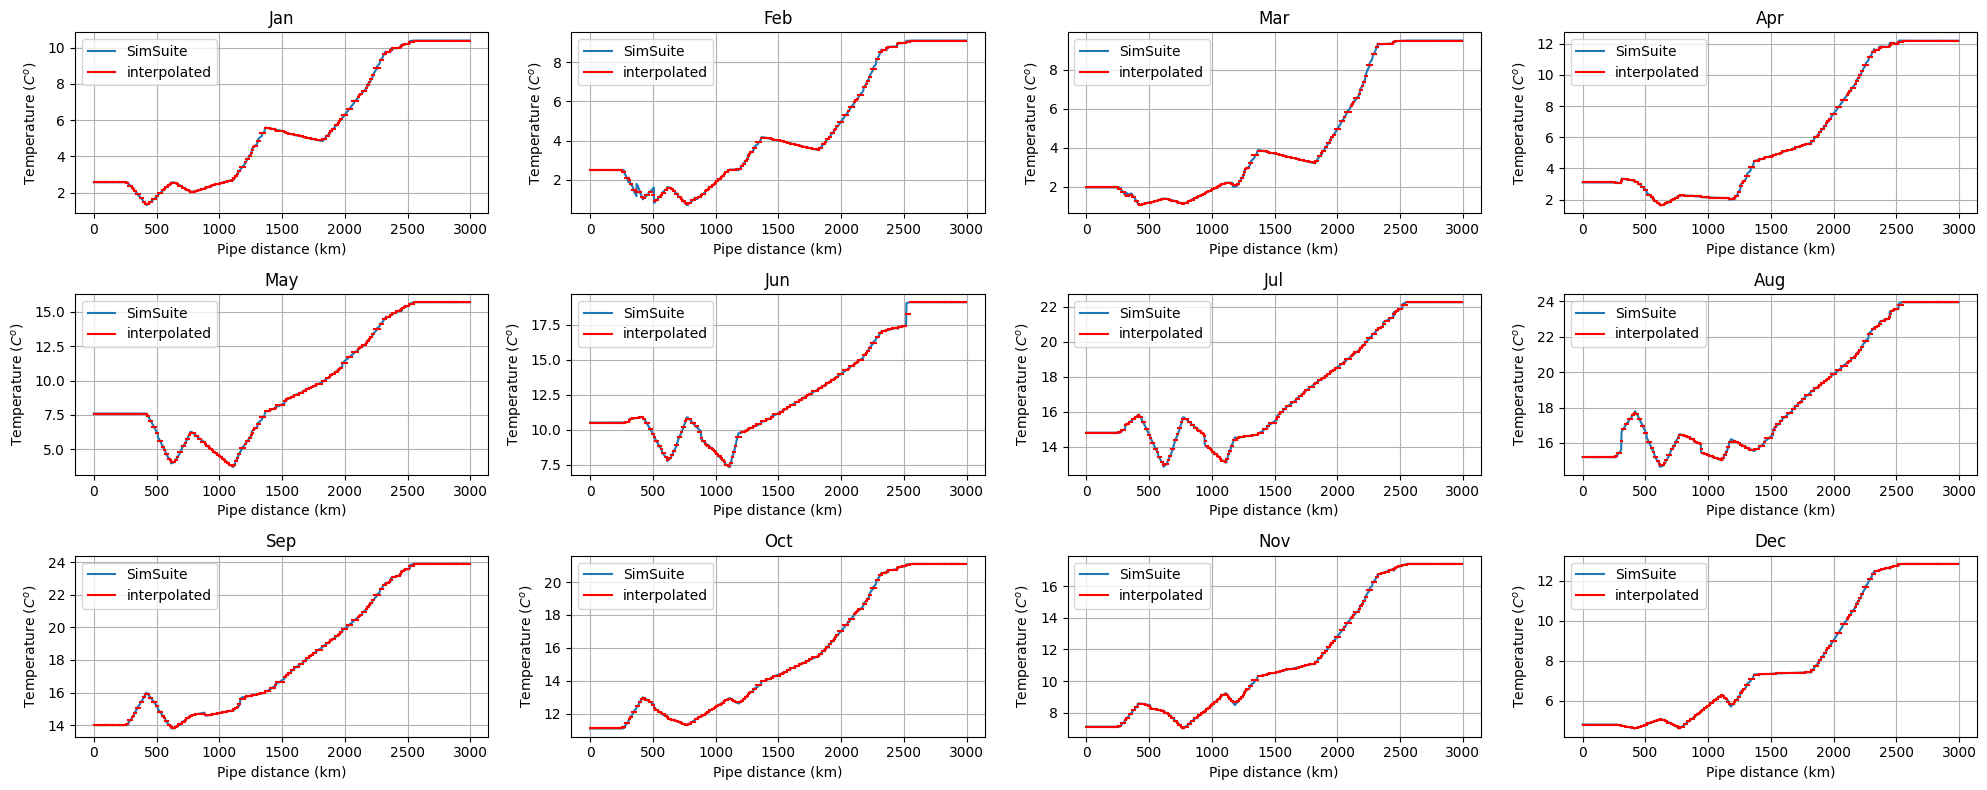

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 8))  # 3 rows, 4 columns
axes = axes.flatten()
for i, col in enumerate(df_profiles_scaled.columns):
    axes[i].plot(df_profiles_scaled.index, df_profiles_scaled[col], label='SimSuite')
    for idx, row in enumerate(df_T_temperature_profile.index):
        x = [df_T_temperature_profile.loc[row, 'from'], df_T_temperature_profile.loc[row, 'to']]
        y = [df_T_temperature_profile.loc[row,col], df_T_temperature_profile.loc[row,col]]
        if idx == 0:
            axes[i].plot(x,y,'r',label='interpolated')
        else:
            axes[i].plot(x,y,'r')
    axes[i].set_title(col)
    axes[i].legend()
    axes[i].grid(True)
    axes[i].set_xlabel('Pipe distance (km)')
    axes[i].set_ylabel('Temperature ($C^o$)')
plt.tight_layout()

Ground temperature variation seems a bit weird. Proceed as it is but need to come back to tune this later.

### Generate intran code

In [19]:
def write_intran_code_for_ground_temperature(monthly_temperature_dict, transfer_line_name):
    '''
    Generate INTRAN code to paint the ground temperature based on a predefined profile.
    Inputs:
        monthly_temperature_dict: dictionary containing the monthly temperature data, with the format:
            'Jan': value,
            'Feb': value,
            ...
        transfer_line_name: string
    Output:
        INTRAN_CODE: formatted string
    '''
    Jan = monthly_temperature_dict['Jan']
    Feb = monthly_temperature_dict['Feb']
    Mar = monthly_temperature_dict['Mar']
    Apr = monthly_temperature_dict['Apr']
    May = monthly_temperature_dict['May']
    Jun = monthly_temperature_dict['Jun']
    Jul = monthly_temperature_dict['Jul']
    Aug = monthly_temperature_dict['Aug']
    Sep = monthly_temperature_dict['Sep']
    Oct = monthly_temperature_dict['Oct']
    Nov = monthly_temperature_dict['Nov']
    Dec = monthly_temperature_dict['Dec']
    INTRAN_CODE = f"""
DEFINE.FUNCTION GRND_MONTHLY_{transfer_line_name},
+ Y = {Dec} {Jan} {Feb} {Mar} {Apr} {May} {Jun} {Jul} {Aug} {Sep} {Oct} {Nov} {Dec} {Jan},
+ X = 0 1 2 3 4 5 6 7 8 9 10 11 12 13,
+ REPEAT = YES
RAMP IF.EXISTS({transfer_line_name}:TG-) = GRND_MONTHLY_{transfer_line_name}(MONTH_LOOKUP)
RAMP IF.EXISTS({transfer_line_name}:TG+) = GRND_MONTHLY_{transfer_line_name}(MONTH_LOOKUP)
    """
    return(INTRAN_CODE)

In [20]:
INTRAN_CODE = '''
DEFINE N_DAYS_IN_MONTH = 
+ (MONTH(TIME) = 1 ) ? 31 :
+ (MONTH(TIME) = 2 ) ? 29 :
+ (MONTH(TIME) = 3 ) ? 31 :
+ (MONTH(TIME) = 4 ) ? 30 :
+ (MONTH(TIME) = 5 ) ? 31 :
+ (MONTH(TIME) = 6 ) ? 30 :
+ (MONTH(TIME) = 7 ) ? 31 :
+ (MONTH(TIME) = 8 ) ? 31 :
+ (MONTH(TIME) = 9 ) ? 30 :
+ (MONTH(TIME) = 10) ? 31 :
+ (MONTH(TIME) = 11) ? 30 :
+ (MONTH(TIME) = 12) ? 31 : "NONE"
DEFINE MONTH_LOOKUP = MONTH(TIME) + DAY(TIME)/N_DAYS_IN_MONTH + HOUR(TIME)/(N_DAYS_IN_MONTH*24) + MINUTE(TIME)/(N_DAYS_IN_MONTH*24*60)
'''
for transfer_line in df_T_temperature_profile.index:
    INTRAN_CODE += write_intran_code_for_ground_temperature(df_T_temperature_profile.loc[transfer_line,:].to_dict(), transfer_line)

## STLCBtoNDRLD

### Check station locations

In [21]:
SPS_start_point = 'HF_STLCB'
SPS_end_point = 'SALE_NDRLD_DEL'
SimSuite_profile_sheet_name = 'STLCBtoNDRLD_profiles'
SimSuite_kmpost_sheet_name = 'STLCBtoNDRLD_stationKM'

HF_locations = KS.get_device_location_in_path(SPS_start_point, SPS_end_point, 'HF')

In [22]:
station_locations  = {key.replace('HF_',''): HF_locations[key] for key in HF_locations.keys()}

In [23]:
print('% 10s | % 10s | % 10s | % 10s' %('Stn.', 'SimSuite', 'SPS', 'diff'))
for idx, row in temperature_profile_dict[SimSuite_kmpost_sheet_name].iterrows():
    if row['Station'] in station_locations.keys():
        print('% 10s | % 10.2f | % 10.2f | % 10.2f' %(row['Station'], row['kmpost'], station_locations[row['Station']], row['kmpost']-station_locations[row['Station']]))

      Stn. |   SimSuite |        SPS |       diff
     HOPEP |     153.77 |     154.48 |      -0.70
     ROCKP |     302.99 |     304.41 |      -1.42
     PNCCP |     393.64 |     395.39 |      -1.75
     CSHSP |     479.33 |     481.36 |      -2.03
     CRMWL |     558.87 |     561.02 |      -2.16
     TPELO |     633.87 |     636.17 |      -2.30
     BRYAN |     717.88 |     720.31 |      -2.43
     DELTA |     793.95 |     796.87 |      -2.92
     WNSBR |     865.01 |     868.11 |      -3.10
     LKTLR |     938.92 |     942.19 |      -3.27
     LUFKN |    1026.44 |    1029.88 |      -3.43
     CORGN |    1094.53 |    1098.46 |      -3.92
     LIBRT |    1182.73 |    1186.84 |      -4.11


The difference in pipe lengths seems to be cumulative from small differences in multiple places. I will scale the SimSuite profile to match SPS length here.

### Scale SimSuite temperature profile

In [24]:
df_profiles_scaled = temperature_profile_dict[SimSuite_profile_sheet_name].set_index('kmpost')
L = KS.get_path_length(SPS_start_point, SPS_end_point)
df_profiles_scaled.index = df_profiles_scaled.index * L / df_profiles_scaled.index[-1]
df_profiles_scaled

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
kmpost,,,,,,,,,,,,
0.000000,8.879,8.036,8.516,11.409,13.929,16.059,19.664,21.186,21.494,19.917,16.024,11.874
40.003318,9.482,8.288,8.789,11.855,14.330,16.444,19.766,21.262,21.657,19.332,16.607,12.459
115.799396,9.609,8.564,9.060,11.865,14.739,17.590,20.494,22.160,22.622,20.176,17.278,12.927
340.030212,10.005,8.818,9.347,12.647,15.105,19.022,21.470,23.481,23.058,20.787,17.569,13.767
481.095972,12.824,11.388,12.299,14.742,17.135,20.159,22.792,23.932,24.617,23.475,21.053,17.603
529.107784,14.560,11.730,12.350,14.350,17.240,20.420,22.950,24.130,24.710,23.530,21.280,17.800
610.779971,15.790,14.130,14.210,15.560,17.550,20.750,23.140,24.460,25.170,24.330,22.260,18.840
1254.039672,16.830,15.700,16.290,18.240,21.140,23.890,25.620,26.850,26.770,25.900,23.500,19.850
1265.929430,16.830,15.700,16.290,18.240,21.140,23.890,25.620,26.850,26.770,25.900,23.500,19.850


### Interpolate

In [25]:
T_loc_dict = KS.get_device_location_in_path(SPS_start_point, SPS_end_point, 'T')

In [26]:
T_x = [0] + list(T_loc_dict.values())

In [27]:
df_temperature_profile_interpolated = pd.DataFrame(index = T_x)

In [28]:
# Interpolate each column using numpy.interp
for column in df_profiles_scaled.columns:
    df_temperature_profile_interpolated[column] = np.interp(T_x, df_profiles_scaled.index, df_profiles_scaled[column])

In [29]:
df_temperature_profile_interpolated

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0.00000,8.879000,8.036000,8.516000,11.409000,13.929000,16.059000,19.664000,21.186000,21.494000,19.917000,16.024000,11.874000
25.74050,9.267006,8.198152,8.691664,11.695983,14.187027,16.306732,19.729633,21.234903,21.598884,19.540576,16.399137,12.250424
59.90490,9.515346,8.360469,8.860156,11.857626,14.437390,16.744902,19.957149,21.497786,21.910378,19.553607,16.783183,12.581882
80.34680,9.549597,8.434905,8.933243,11.860323,14.547696,17.053974,20.153488,21.739973,22.170634,19.781230,16.964149,12.708099
89.56748,9.565047,8.468480,8.966211,11.861539,14.597451,17.193386,20.242050,21.849215,22.288028,19.883904,17.045777,12.765032
...,...,...,...,...,...,...,...,...,...,...,...,...
1218.11431,16.771917,15.612317,16.173834,18.090325,20.939502,23.714634,25.481495,26.716521,26.680642,25.812317,23.430747,19.793593
1230.52241,16.791978,15.642602,16.213956,18.142021,21.008751,23.775203,25.529332,26.762623,26.711505,25.842602,23.454666,19.813075
1245.13031,16.815596,15.678255,16.261191,18.202881,21.090277,23.846510,25.585651,26.816898,26.747839,25.878255,23.482826,19.836011
1255.05283,16.830000,15.700000,16.290000,18.240000,21.140000,23.890000,25.620000,26.850000,26.770000,25.900000,23.500000,19.850000


In [30]:
df_T_temperature_profile = pd.DataFrame(index = T_loc_dict.keys())

In [31]:
for column in df_temperature_profile_interpolated.columns:
    y = df_temperature_profile_interpolated[column].values
    df_T_temperature_profile[column] = (y[:-1] + y[1:])/2
df_T_temperature_profile['from'] = df_temperature_profile_interpolated.index[:-1]
df_T_temperature_profile['to'] = df_temperature_profile_interpolated.index[1:]

In [32]:
df_T_temperature_profile

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,from,to
T_STLCB_STLCB_01A_CKV,9.073003,8.117076,8.603832,11.552491,14.058014,16.182866,19.696816,21.210451,21.546442,19.728788,16.211568,12.062212,0.00000,25.74050
T_STLCB_01A_STLCB_02A,9.391176,8.279310,8.775910,11.776804,14.312209,16.525817,19.843391,21.366344,21.754631,19.547092,16.591160,12.416153,25.74050,59.90490
T_STLCB_02A_RILEY,9.532472,8.397687,8.896700,11.858974,14.492543,16.899438,20.055318,21.618879,22.040506,19.667419,16.873666,12.644990,59.90490,80.34680
T_RILEY_RILEY_01A_CKV,9.557322,8.451693,8.949727,11.860931,14.572573,17.123680,20.197769,21.794594,22.229331,19.832567,17.004963,12.736566,80.34680,89.56748
T_RILEY_01A_RILEY_02A,9.582111,8.505564,9.002623,11.862883,14.652405,17.347366,20.339866,21.969873,22.417687,19.997306,17.135934,12.827914,89.56748,109.93578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T_LIBRT_01A_LIBRT_02A,16.764070,15.600471,16.158140,18.070103,20.912415,23.690942,25.462782,26.698488,26.668569,25.800471,23.421391,19.785972,1208.40712,1218.11431
T_LIBRT_02A_LIBRT_03A,16.781948,15.627459,16.193895,18.116173,20.974127,23.744919,25.505414,26.739572,26.696073,25.827459,23.442707,19.803334,1218.11431,1230.52241
T_LIBRT_03A_LIBRT_04A,16.803787,15.660428,16.237574,18.172451,21.049514,23.810857,25.557492,26.789760,26.729672,25.860428,23.468746,19.824543,1230.52241,1245.13031
T_LIBRT_04A_LUCAS,16.822798,15.689127,16.275596,18.221441,21.115139,23.868255,25.602826,26.833449,26.758920,25.889127,23.491413,19.843006,1245.13031,1255.05283


### Check result

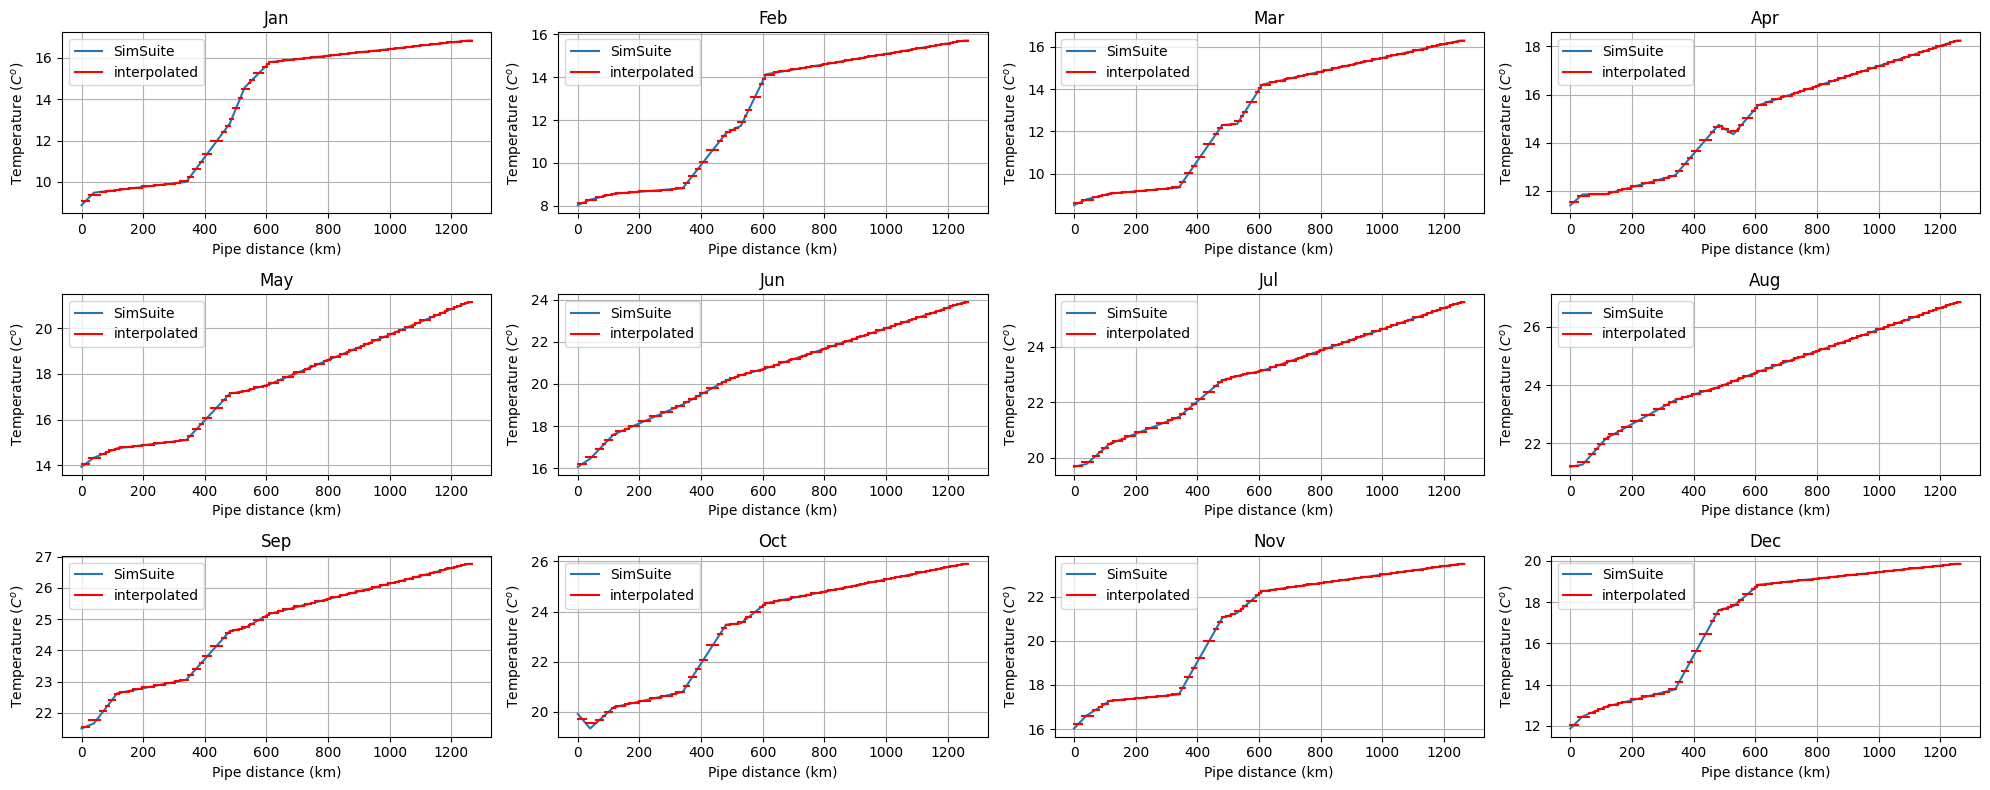

In [33]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 8))  # 3 rows, 4 columns
axes = axes.flatten()
for i, col in enumerate(df_profiles_scaled.columns):
    axes[i].plot(df_profiles_scaled.index, df_profiles_scaled[col], label='SimSuite')
    for idx, row in enumerate(df_T_temperature_profile.index):
        x = [df_T_temperature_profile.loc[row, 'from'], df_T_temperature_profile.loc[row, 'to']]
        y = [df_T_temperature_profile.loc[row,col], df_T_temperature_profile.loc[row,col]]
        if idx == 0:
            axes[i].plot(x,y,'r',label='interpolated')
        else:
            axes[i].plot(x,y,'r')
    axes[i].set_title(col)
    axes[i].legend()
    axes[i].grid(True)
    axes[i].set_xlabel('Pipe distance (km)')
    axes[i].set_ylabel('Temperature ($C^o$)')
plt.tight_layout()

Ground temperature variation seems a bit weird. Proceed as it is but need to come back to tune this later.

### Generate intran code

In [34]:
for transfer_line in df_T_temperature_profile.index:
    INTRAN_CODE += write_intran_code_for_ground_temperature(df_T_temperature_profile.loc[transfer_line,:].to_dict(), transfer_line)

## HSTNLtoHSTNT

### Check station locations

In [35]:
SPS_start_point = 'NO_LIBRT_D'
SPS_end_point = 'SALE_HSTNT_DEL'
SimSuite_profile_sheet_name = 'HSTNLtoHSTNT_profiles'
SimSuite_kmpost_sheet_name = 'HSTNLtoHSTNT_stationKM'

HF_locations = KS.get_device_location_in_path(SPS_start_point, SPS_end_point, 'HF')
B_locations = KS.get_device_location_in_path(SPS_start_point, SPS_end_point, 'B')

In [36]:
station_locations  = {key.replace('HF_',''): HF_locations[key] for key in HF_locations.keys()}
station_locations['HSTNT'] = B_locations['B_HSTNT_B0_MOV2004']

In [37]:
print('% 10s | % 10s | % 10s | % 10s' %('Stn.', 'SimSuite', 'SPS', 'diff'))
for idx, row in temperature_profile_dict[SimSuite_kmpost_sheet_name].iterrows():
    if row['Station'] in station_locations.keys():
        print('% 10s | % 10.2f | % 10.2f | % 10.2f' %(row['Station'], row['kmpost'], station_locations[row['Station']], row['kmpost']-station_locations[row['Station']]))

      Stn. |   SimSuite |        SPS |       diff
     HSTNL |    1182.73 |       0.00 |    1182.73
     HSTNT |    1260.43 |      77.92 |    1182.50


There is an offset, but length is the same.

### Scale SimSuite temperature profile

In [38]:
df_profiles_scaled = temperature_profile_dict[SimSuite_profile_sheet_name].set_index('kmpost')
df_profiles_scaled.index = df_profiles_scaled.index - df_profiles_scaled.index[0]
L = KS.get_path_length(SPS_start_point, SPS_end_point)
df_profiles_scaled.index = df_profiles_scaled.index * L / df_profiles_scaled.index[-1]
df_profiles_scaled

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
kmpost,,,,,,,,,,,,
0.000000,14.31,14.1,15.70,18.35,21.55,24.36,25.69,26.47,25.74,23.51,20.22,16.35
66.235876,14.83,14.7,16.29,18.94,22.14,24.89,26.12,26.85,26.17,23.95,20.70,16.85
78.024990,14.83,14.7,16.29,18.94,22.14,24.89,26.12,26.85,26.17,23.95,20.70,16.85


### Interpolate

In [39]:
T_loc_dict = KS.get_device_location_in_path(SPS_start_point, SPS_end_point, 'T')

In [40]:
T_x = [0] + list(T_loc_dict.values())

In [41]:
df_temperature_profile_interpolated = pd.DataFrame(index = T_x)

In [42]:
# Interpolate each column using numpy.interp
for column in df_profiles_scaled.columns:
    df_temperature_profile_interpolated[column] = np.interp(T_x, df_profiles_scaled.index, df_profiles_scaled[column])

In [43]:
df_temperature_profile_interpolated

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0.00000,14.310000,14.100000,15.700000,18.350000,21.550000,24.360000,25.690000,26.470000,25.740000,23.510000,20.220000,16.350000
19.68380,14.464532,14.278306,15.875335,18.525335,21.725335,24.517504,25.817786,26.582927,25.867786,23.640758,20.362645,16.498589
28.94529,14.537242,14.362202,15.957832,18.607832,21.807832,24.591612,25.877911,26.636061,25.927911,23.702281,20.429762,16.568502
39.42719,14.619532,14.457153,16.051200,18.701200,21.901200,24.675485,25.945959,26.696197,25.995959,23.771912,20.505722,16.647627
51.15499,14.711604,14.563389,16.155666,18.805666,22.005666,24.769327,26.022096,26.763480,26.072096,23.849819,20.590711,16.736158
66.79369,14.830000,14.700000,16.290000,18.940000,22.140000,24.890000,26.120000,26.850000,26.170000,23.950000,20.700000,16.850000
70.74491,14.830000,14.700000,16.290000,18.940000,22.140000,24.890000,26.120000,26.850000,26.170000,23.950000,20.700000,16.850000
77.92499,14.830000,14.700000,16.290000,18.940000,22.140000,24.890000,26.120000,26.850000,26.170000,23.950000,20.700000,16.850000


In [44]:
df_T_temperature_profile = pd.DataFrame(index = T_loc_dict.keys())

In [45]:
for column in df_temperature_profile_interpolated.columns:
    y = df_temperature_profile_interpolated[column].values
    df_T_temperature_profile[column] = (y[:-1] + y[1:])/2
df_T_temperature_profile['from'] = df_temperature_profile_interpolated.index[:-1]
df_T_temperature_profile['to'] = df_temperature_profile_interpolated.index[1:]

In [46]:
df_T_temperature_profile

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,from,to
T_LIBRT_HSTNL_01A,14.387266,14.189153,15.787667,18.437667,21.637667,24.438752,25.753893,26.526464,25.803893,23.575379,20.291323,16.424294,0.00000,19.68380
T_HSTNL_01A_HSTNL_02A,14.500887,14.320254,15.916583,18.566583,21.766583,24.554558,25.847849,26.609494,25.897849,23.671520,20.396203,16.533545,19.68380,28.94529
T_HSTNL_02A_HSTNL_03A_CKV,14.578387,14.409677,16.004516,18.654516,21.854516,24.633548,25.911935,26.666129,25.961935,23.737097,20.467742,16.608064,28.94529,39.42719
T_HSTNL_03A_HSTNL_04A,14.665568,14.510271,16.103433,18.753433,21.953433,24.722406,25.984027,26.729838,26.034027,23.810865,20.548217,16.691892,39.42719,51.15499
T_HSTNL_04A_HSTNL_05A,14.770802,14.631695,16.222833,18.872833,22.072833,24.829664,26.071048,26.806740,26.121048,23.899909,20.645356,16.793079,51.15499,66.79369
T_HSTNL_05A_HSTNL_06A_CKV,14.830000,14.700000,16.290000,18.940000,22.140000,24.890000,26.120000,26.850000,26.170000,23.950000,20.700000,16.850000,66.79369,70.74491
T_HSTNL_06A_HSTNT,14.830000,14.700000,16.290000,18.940000,22.140000,24.890000,26.120000,26.850000,26.170000,23.950000,20.700000,16.850000,70.74491,77.92499


### Check result

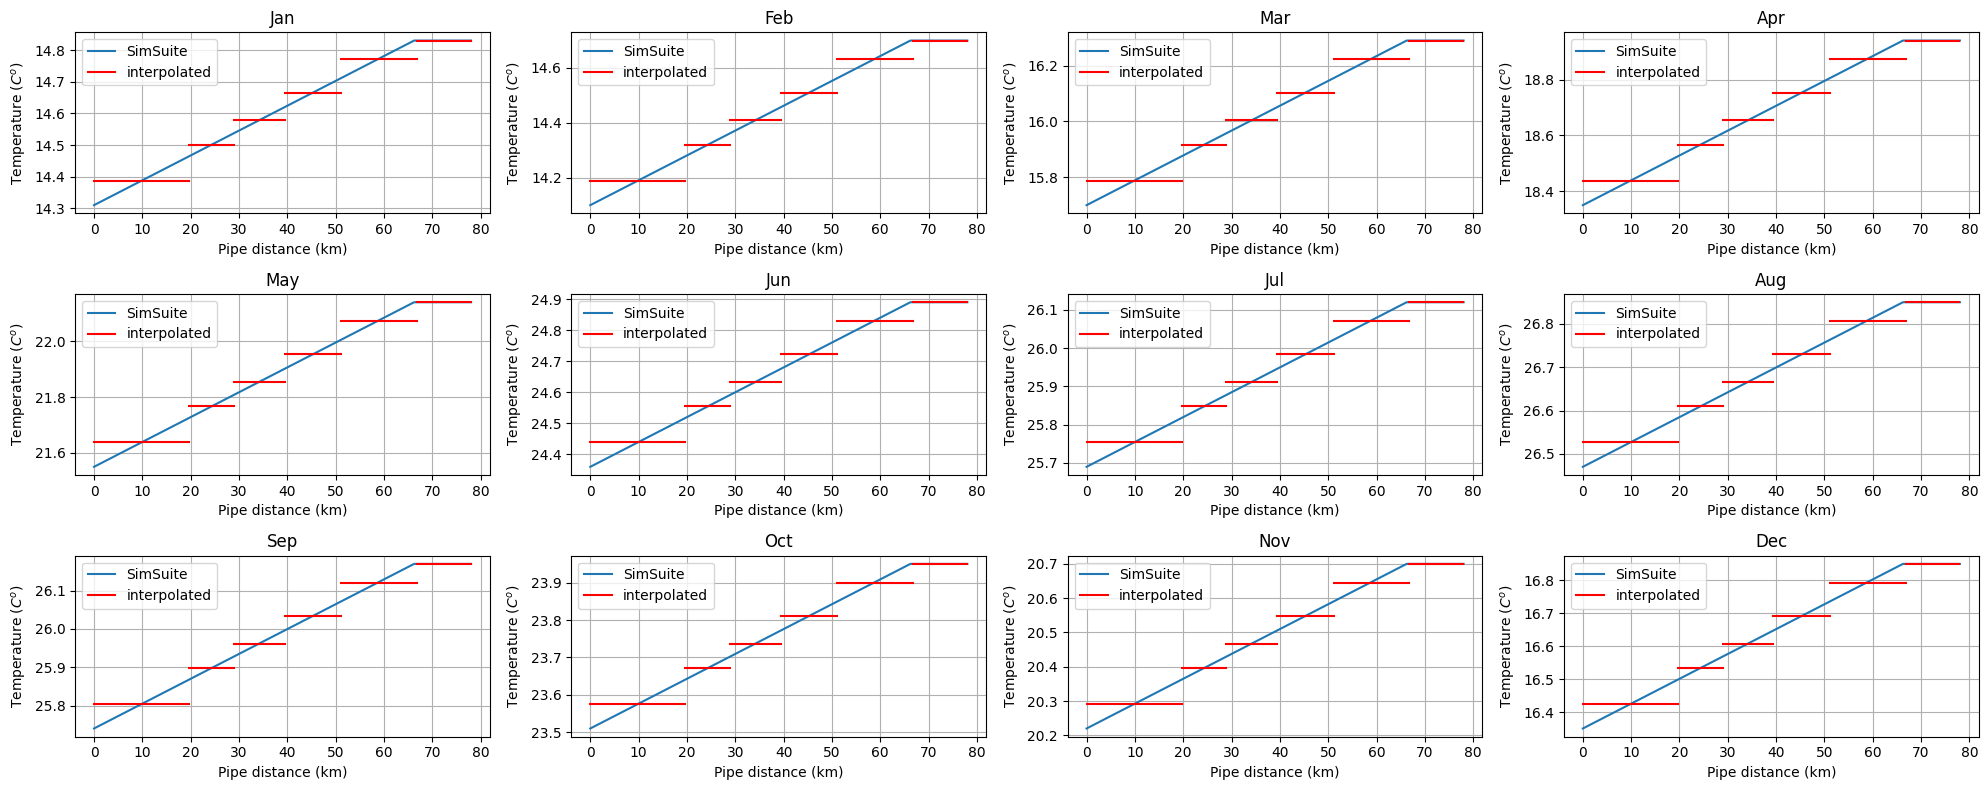

In [47]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 8))  # 3 rows, 4 columns
axes = axes.flatten()
for i, col in enumerate(df_profiles_scaled.columns):
    axes[i].plot(df_profiles_scaled.index, df_profiles_scaled[col], label='SimSuite')
    for idx, row in enumerate(df_T_temperature_profile.index):
        x = [df_T_temperature_profile.loc[row, 'from'], df_T_temperature_profile.loc[row, 'to']]
        y = [df_T_temperature_profile.loc[row,col], df_T_temperature_profile.loc[row,col]]
        if idx == 0:
            axes[i].plot(x,y,'r',label='interpolated')
        else:
            axes[i].plot(x,y,'r')
    axes[i].set_title(col)
    axes[i].legend()
    axes[i].grid(True)
    axes[i].set_xlabel('Pipe distance (km)')
    axes[i].set_ylabel('Temperature ($C^o$)')
plt.tight_layout()

### Generate intran code

In [48]:
for transfer_line in df_T_temperature_profile.index:
    INTRAN_CODE += write_intran_code_for_ground_temperature(df_T_temperature_profile.loc[transfer_line,:].to_dict(), transfer_line)

## CTGOItoCTGOD

### Check station locations

In [49]:
SPS_start_point = 'NO_LIBRT_01A_S'
SPS_end_point = 'SALE_CITGO_DEL'
SimSuite_profile_sheet_name = 'CTGOItoCTGOD_profiles'
SimSuite_kmpost_sheet_name = 'CTGOItoCTGOD_stationKM'

HF_locations = KS.get_device_location_in_path(SPS_start_point, SPS_end_point, 'HF')
H_locations = KS.get_device_location_in_path(SPS_start_point, SPS_end_point, 'H')

In [50]:
station_locations  = {key.replace('HF_',''): HF_locations[key] for key in HF_locations.keys()}
station_locations['CTGOD'] = H_locations['H_CTGOD_D1']

In [51]:
print('% 10s | % 10s | % 10s | % 10s' %('Stn.', 'SimSuite', 'SPS', 'diff'))
for idx, row in temperature_profile_dict[SimSuite_kmpost_sheet_name].iterrows():
    if row['Station'] in station_locations.keys():
        print('% 10s | % 10.2f | % 10.2f | % 10.2f' %(row['Station'], row['kmpost'], station_locations[row['Station']], row['kmpost']-station_locations[row['Station']]))

      Stn. |   SimSuite |        SPS |       diff
     CTGOI |    1204.20 |       0.10 |    1204.10
     CTGOD |    1213.55 |       9.80 |    1203.75


There is an offset and difference in length. Scale it.

### Scale SimSuite temperature profile

In [52]:
df_profiles_scaled = temperature_profile_dict[SimSuite_profile_sheet_name].set_index('kmpost')
df_profiles_scaled.index = df_profiles_scaled.index - df_profiles_scaled.index[0]
L = KS.get_path_length(SPS_start_point, SPS_end_point)
df_profiles_scaled.index = df_profiles_scaled.index * L / df_profiles_scaled.index[-1]
df_profiles_scaled

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
kmpost,,,,,,,,,,,,
0.00000,14.48,14.29,15.89,18.54,21.74,24.53,25.83,26.59,25.88,23.65,20.37,16.51
9.79533,14.55,14.29,15.89,18.54,21.74,24.53,25.83,26.59,25.88,23.65,20.37,16.51


### Interpolate

In [53]:
T_loc_dict = KS.get_device_location_in_path(SPS_start_point, SPS_end_point, 'T')

In [54]:
T_x = [0] + list(T_loc_dict.values())

In [55]:
df_temperature_profile_interpolated = pd.DataFrame(index = T_x)

In [56]:
# Interpolate each column using numpy.interp
for column in df_profiles_scaled.columns:
    df_temperature_profile_interpolated[column] = np.interp(T_x, df_profiles_scaled.index, df_profiles_scaled[column])

In [57]:
df_temperature_profile_interpolated

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0.00000,14.480000,14.29,15.89,18.54,21.74,24.53,25.83,26.59,25.88,23.65,20.37,16.51
9.59533,14.548571,14.29,15.89,18.54,21.74,24.53,25.83,26.59,25.88,23.65,20.37,16.51


In [58]:
df_T_temperature_profile = pd.DataFrame(index = T_loc_dict.keys())

In [59]:
for column in df_temperature_profile_interpolated.columns:
    y = df_temperature_profile_interpolated[column].values
    df_T_temperature_profile[column] = (y[:-1] + y[1:])/2
df_T_temperature_profile['from'] = df_temperature_profile_interpolated.index[:-1]
df_T_temperature_profile['to'] = df_temperature_profile_interpolated.index[1:]

In [60]:
df_T_temperature_profile

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,from,to
T_CITGO_LATERAL,14.514285,14.29,15.89,18.54,21.74,24.53,25.83,26.59,25.88,23.65,20.37,16.51,0.0,9.59533


### Check result

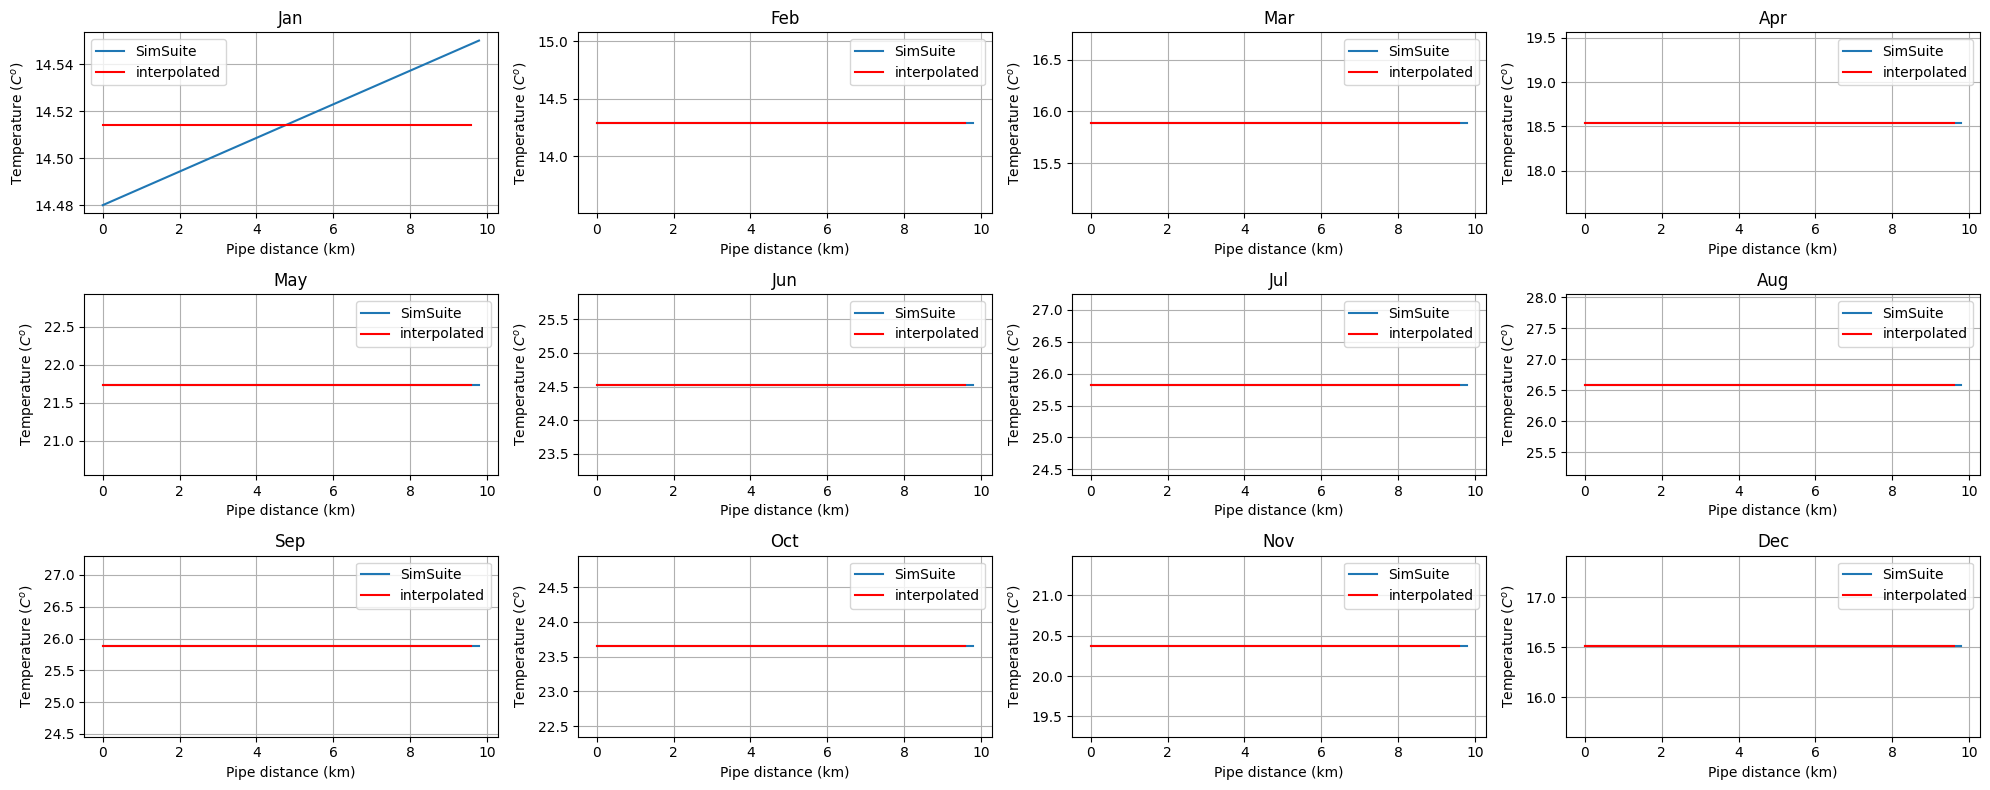

In [61]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 8))  # 3 rows, 4 columns
axes = axes.flatten()
for i, col in enumerate(df_profiles_scaled.columns):
    axes[i].plot(df_profiles_scaled.index, df_profiles_scaled[col], label='SimSuite')
    for idx, row in enumerate(df_T_temperature_profile.index):
        x = [df_T_temperature_profile.loc[row, 'from'], df_T_temperature_profile.loc[row, 'to']]
        y = [df_T_temperature_profile.loc[row,col], df_T_temperature_profile.loc[row,col]]
        if idx == 0:
            axes[i].plot(x,y,'r',label='interpolated')
        else:
            axes[i].plot(x,y,'r')
    axes[i].set_title(col)
    axes[i].legend()
    axes[i].grid(True)
    axes[i].set_xlabel('Pipe distance (km)')
    axes[i].set_ylabel('Temperature ($C^o$)')
plt.tight_layout()

### Generate intran code

In [62]:
for transfer_line in df_T_temperature_profile.index:
    INTRAN_CODE += write_intran_code_for_ground_temperature(df_T_temperature_profile.loc[transfer_line,:].to_dict(), transfer_line)

# Temperature error

In [63]:
INTRAN_CODE += '\n'

In [64]:
exception_dict = {
    'LIBRT_01A': 'LIBRT-01A-B0-TMLS',
    'CTGOI':     'LIBRT-01A-B0-TMLS',
}

HF_list = [data['name'] for u, v, data in KS.G.edges(data=True) if data.get('type') == 'HF']
for HF in HF_list:
    station_name = HF[3:]
    last_T = list(KS.get_device_location_in_path('TAKE_HRDSY_REC', HF, 'T').keys())[-1] 
    last_T_loc = list(KS.get_device_location_in_path('TAKE_HRDSY_REC', HF, 'T').values())[-1]    
    try:
        last_HF_loc = list(KS.get_device_location_in_path('TAKE_HRDSY_REC', HF, 'HF').values())[-1]
    except:
        last_HF_loc = -1

    if station_name+'-A0-TS' in KS.df_SC['Unnamed: 0'].values:
        SCADA_NAME = station_name+'-A0-TS'
    elif station_name+'-B0-TS' in KS.df_SC['Unnamed: 0'].values:
        SCADA_NAME = station_name+'-B0-TS'
    elif station_name in exception_dict:
        SCADA_NAME = exception_dict[station_name]
    elif last_T_loc < last_HF_loc:
        print(HF, ' behind another HF, not considered')
    else:
        SCADA_NAME = None
        print('%s for %s NOT FOUND'%(SCADA_NAME, station_name))
    if SCADA_NAME != 'NOTFOUND':
        INTRAN_CODE += 'DEFINE %s_TS_TEMPERR = %s:T+ - %s:RAW\n'%(station_name, last_T, SCADA_NAME)

HF_HSTNL  behind another HF, not considered
HF_STLCB  behind another HF, not considered
HF_STLCA  behind another HF, not considered


In [65]:
INTRAN_CODE += 'DEFINE %s_TS_TEMPERR = %s:T+ - %s:RAW\n'%('PTOKA', 'T_PEROP_25_3_PTOKA', 'PTOKA-A0-TSA')
INTRAN_CODE += 'DEFINE %s_TS_TEMPERR = %s:T+ - %s:RAW\n'%('CITGO', 'T_CITGO_LATERAL', 'CTGOD-B0-TMLS')
INTRAN_CODE += 'DEFINE %s_TS_TEMPERR = %s:T+ - %s:RAW\n'%('LUCAS', 'T_LIBRT_04A_LUCAS', 'LUCAS-B0-TMLS')
INTRAN_CODE += 'DEFINE %s_TS_TEMPERR = %s:T+ - %s:RAW\n'%('NDRLD', 'T_LUCAS_NDRLD', 'NDRLD-B0-TMLS')
INTRAN_CODE += 'DEFINE %s_TS_TEMPERR = %s:T+ - %s:RAW\n'%('PNLPN', 'T_NDLPS_PNLPN', 'PNLPN-B0-TMLD')
INTRAN_CODE += 'DEFINE %s_TS_TEMPERR = %s:T+ - %s:RAW\n'%('PTNCI', 'T_PNLPN_PTNCI', 'PTNCI-B0-TSA')

In [66]:
import datetime
import ipynbname
nb_fname = ipynbname.name()
now = datetime.datetime.now()

header = '/* Generated by %s.ipynb on %s\n'%(nb_fname, now.strftime('%Y-%M-%D %H:%M:%S'))
INTRAN_CODE = header + INTRAN_CODE

In [67]:
with open("../output/GROUND_TEMPERATURE.INC", "w") as file:
    file.write(INTRAN_CODE)